In [ ]:
explainer.fit()

In [4]:
import numpy as np
from keras import backend as K
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from matplotlib import pyplot as plt
%matplotlib inline

import rise

K.set_learning_phase(0)

model = ResNet50()
input_size = (224, 224)

def load_img(path):
    img = image.load_img(path, target_size=input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]



explainer = rise.RiseImageExplainer()
explainer.fit(model.predict,
            input_size,
            number_of_masks=200,
            mask_granularity=8,
            mask_density=0.5, channels_last=True)

img, x = load_img('bullcar.jpg')
sal = explainer.explain(x)

Generating masks:   0%|          | 0/200 [00:00<?, ?it/s]/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Calculating saliency maps: 100%|██████████| 10/10 [00:15<00:00,  1.44s/it]


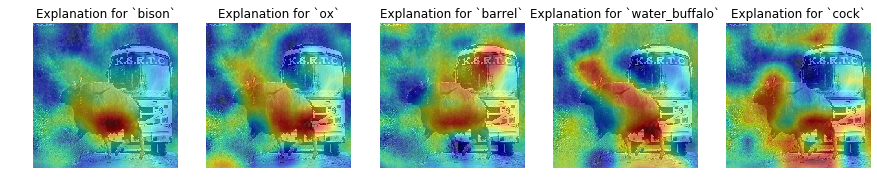

In [5]:
class_idxs = model.predict(x).argsort()[0][::-1]
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(15, 6)
for i in range(5):
    class_idx = class_idxs[i]
    axes[i].set_title('Explanation for `{}`'.format(class_name(class_idx)))
    axes[i].axis('off')
    axes[i].imshow(img)
    axes[i].imshow(sal[class_idx], cmap='jet', alpha=0.5)

plt.show()